# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


import scipy.stats as stats


### Общая информация по данным

In [2]:
def data_info(data_file):
    data = pd.read_csv(data_file, index_col = 'date', parse_dates=True)
    print(data_file)
    display(data.head(10))
    display(data.info())
    return(data)

In [3]:
test = data_info('/datasets/gold_recovery_test_new.csv')
train = data_info('/datasets/gold_recovery_train_new.csv')
full = data_info('/datasets/gold_recovery_full_new.csv')

/datasets/gold_recovery_test_new.csv


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,-497.903666,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,-497.923683,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,-503.451306,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,-499.890350,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

None

/datasets/gold_recovery_train_new.csv


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

None

/datasets/gold_recovery_full_new.csv


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

None

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошая идея, дату перевести в индекс:)</div>

### Проверка расчета эффективности обогащения

In [4]:
print(train['rougher.output.recovery'])

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64


In [5]:
def calc_rougher_recovery(row):
     return(row['rougher.output.concentrate_au']*(row['rougher.input.feed_au']-row['rougher.output.tail_au']) ) / (row['rougher.input.feed_au']*(row['rougher.output.concentrate_au']-row['rougher.output.tail_au']))*100

In [6]:
train['rougher.output.recovery_calc'] = train.apply(calc_rougher_recovery, axis=1)
display(train[['rougher.output.recovery_calc','rougher.output.recovery']])
print('Средняя абсолютная ошибка: ',mean_absolute_error(train['rougher.output.recovery'],train['rougher.output.recovery_calc']))

,rougher.output.recovery_calc,rougher.output.recovery
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794
...,...,...
2018-08-18 06:59:59,89.574376,89.574376
2018-08-18 07:59:59,87.724007,87.724007
2018-08-18 08:59:59,88.890579,88.890579


Средняя абсолютная ошибка:  9.73512347450521e-15


**Выводы:** ошибка вычисленной эффективности обогащения ничтожна мала, значит она вычислена правильно.

### Отбор признаков из обучающей выборки

In [7]:
free_columns = list(set(train.columns) ^ set(test.columns))
display(sorted(free_columns))

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery_calc',
 'rougher.output.tail_ag',
 'rougher.out

In [8]:
train[free_columns].head()

,primary_cleaner.output.concentrate_au,final.output.tail_pb,rougher.output.concentrate_sol,primary_cleaner.output.concentrate_pb,rougher.output.tail_au,final.output.tail_sol,final.output.recovery,rougher.output.concentrate_au,primary_cleaner.output.tail_pb,secondary_cleaner.output.tail_au,...,secondary_cleaner.output.tail_pb,final.output.concentrate_pb,rougher.output.recovery,primary_cleaner.output.tail_ag,rougher.calculation.floatbank11_sulfate_to_au_feed,primary_cleaner.output.concentrate_sol,final.output.concentrate_ag,primary_cleaner.output.tail_au,rougher.output.recovery_calc,rougher.calculation.sulfate_to_au_concentrate
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,34.174427,0.895447,28.029297,10.389648,1.170244,16.904297,70.541216,19.793808,2.534912,2.606185,...,4.694824,9.889648,87.107763,14.936526,3520.337158,19.529297,6.055403,2.106679,87.107763,41885.707031
2016-01-15 01:00:00,34.118526,0.927452,28.067063,10.497069,1.184827,16.634514,69.266198,20.050975,3.049646,2.488248,...,4.592547,9.968944,86.843261,16.250511,3489.981857,19.369147,6.029369,2.353017,86.843261,42050.861809
2016-01-15 02:00:00,33.969464,0.953716,27.454037,10.354494,1.162562,16.208849,68.116445,19.737170,3.124664,2.458187,...,4.624775,10.213995,86.842308,16.491823,3502.359819,19.167579,6.055926,2.416800,86.842308,42018.101184
2016-01-15 03:00:00,28.260743,0.883763,27.341277,8.496563,1.079755,16.532835,68.347543,19.320810,2.960362,2.322062,...,4.482453,9.977019,87.226430,16.024359,3499.162912,15.978538,6.047977,2.262051,87.226430,42029.447991
2016-01-15 04:00:00,33.044932,0.792826,27.041023,9.986786,1.012642,16.525686,66.927016,19.216101,3.112100,2.330448,...,4.470737,10.142511,86.688794,16.480185,3506.679315,19.199864,6.148599,2.277073,86.688794,42125.354245


Для обучения модели, исключим признаки, которые отсутствуют в тестовой выборке

In [9]:
train = train.drop(free_columns, axis=1)

**Выводы:** в тестовой выборке отсутствуют столбцы
- с выходными значениями на каждом из этапов 'output'
- расчетами 'calculation'
- с итоговыми зачениями 'final'

все эти признаки, кроме целевых были удалены.

###  Предобработка данных

In [10]:
train[train.isna().any(axis=1)].shape

(1470, 52)

In [11]:
test[test.isna().any(axis=1)].shape

(61, 52)

В обучающей выборке пропуски у 1470 объектов, в тестовой у 61

В дальнейшем при моделировании рассмотрим два варианта
- пропуски удалены
- пропуски заполнены ближайшими значениями

## Анализ данных

### Исследование распределения концентрации металлов на разных стадиях

In [12]:
full = full.fillna(method = 'ffill')

In [13]:
def show_dynamics_concentrate(met):
    plt.figure(figsize=(12, 7))

    plt.hist(full['rougher.input.feed_'+met],bins=100,facecolor='#3d8f3f',alpha = 0.6,label="Исходное сырьё")
    plt.hist(full['rougher.output.concentrate_'+met],bins=100,facecolor='#a9b763',alpha = 0.6, label="После флотации")
    plt.hist(full['primary_cleaner.output.concentrate_'+met],bins=100,facecolor='#ffdfa1',alpha = 0.6, label="После первичной очистки")
    plt.hist(full['final.output.concentrate_'+met],bins=100,facecolor='#de425b',alpha =0.8, label="Финальный результат")

    plt.title(f'Распределение концентрации {met.upper()} на разных стадиях')
    plt.xlabel('Концентрация, у.е.')
    plt.ylabel('Количество наблюдений')
    plt.legend()
    
    plt.show()

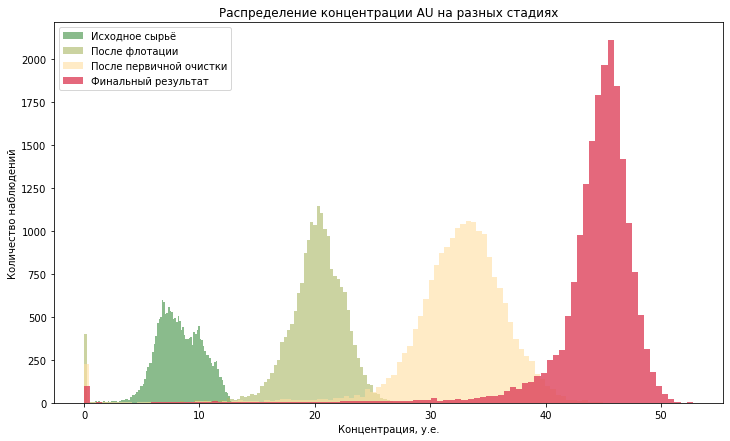

In [14]:
show_dynamics_concentrate('au')

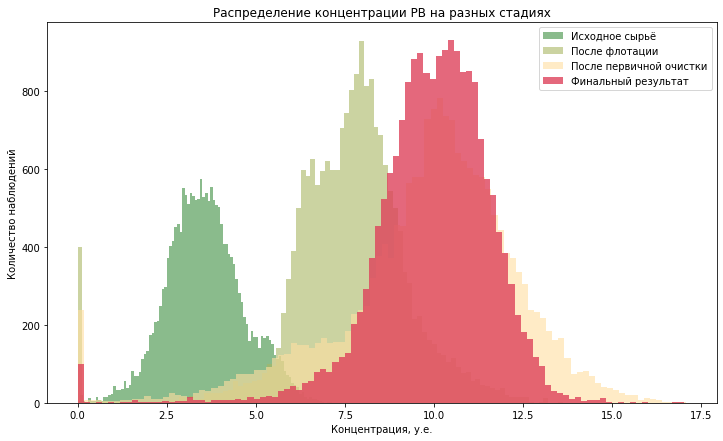

In [15]:
show_dynamics_concentrate('pb')

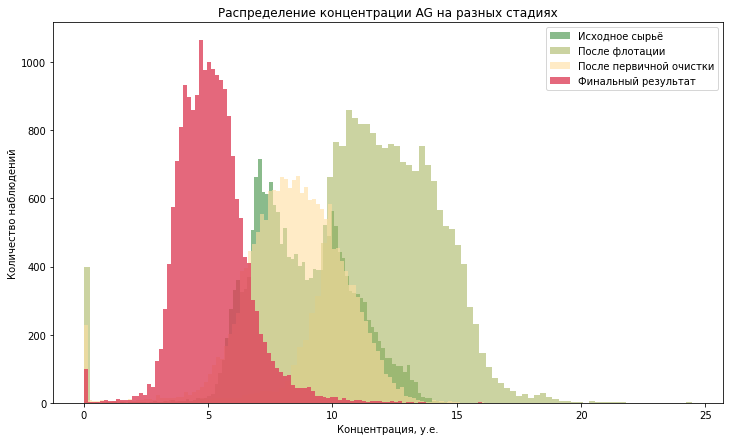

In [16]:
show_dynamics_concentrate('ag')

- На каждом этапе коцентрация AU - золота увеличивается
- Концетраци PB - свинца после первчиной очистки и на финальной стадии меняется не существенно
- Концетраци AG - серебра существенно уменьшается в финальном результате

На всех этапах для всех металлов в данных есть нулевые значения

### Сравнение распределений размеров частиц

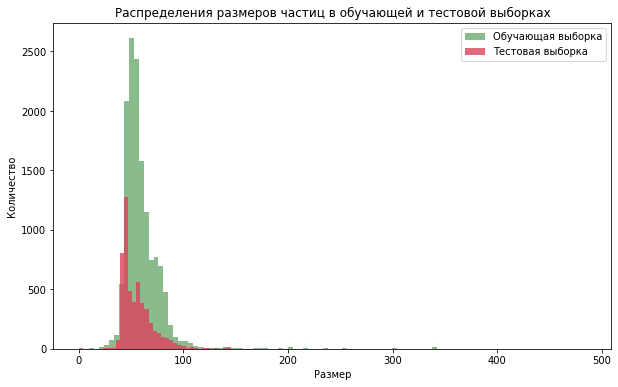

In [17]:
plt.figure(figsize=(10,6))
plt.hist(train['rougher.input.feed_size'].dropna(), label='Обучающая выборка',bins=100,facecolor='#3d8f3f',alpha = 0.6)
plt.hist(test['rougher.input.feed_size'].dropna(), label='Тестовая выборка',bins=100,facecolor='#de425b',alpha =0.8)
plt.title('Распределения размеров частиц в обучающей и тестовой выборках')
plt.legend()
plt.xlabel('Размер')
plt.ylabel('Количество')
plt.show()

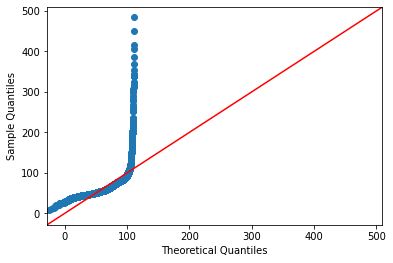

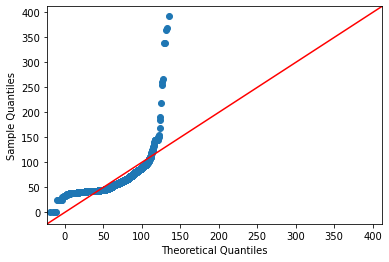

In [18]:
import statsmodels.api as sm
import scipy


fig = sm.qqplot(train['rougher.input.feed_size'], loc=train['rougher.input.feed_size'].mean(), scale=train['rougher.input.feed_size'].std(), line ='45')
fig = sm.qqplot(test['rougher.input.feed_size'], loc=train['rougher.input.feed_size'].mean(), scale=train['rougher.input.feed_size'].std(), line ='45')


Как видим распределения не являются нормальными, но между собой очень схожи

### Исследование суммарных концентраций веществ и поиск аномалий

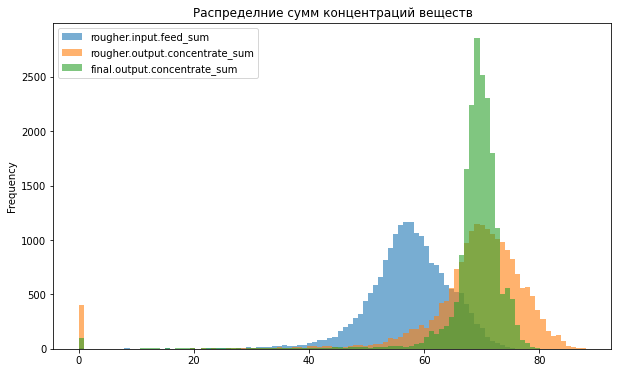

In [19]:
elements = ['au', 'ag','pb','sol']
steps = ['rougher.input.feed_','rougher.output.concentrate_','final.output.concentrate_']
list_columns = []

summary = pd.DataFrame()
#наполнение списка столбцов, по которым будет происходить суммирование
for i in range(3):
    list_columns.append([])
    for j in range(4):
        list_columns[i].append(steps[i]+elements[j])

#сохранение сумм в summary на каждом из этапов
for index in range(len(list_columns)):
    summary[steps[index]+'sum'] = full[list_columns[index]].sum(axis=1)
    
summary.plot(kind='hist',bins=100,figsize=(10,6),legend=True,alpha=0.6, title="Распределние сумм концентраций веществ")
    
plt.show()

Нулевые суммарные концентрации веществ можно считать аномальными

Удалим наблюдения, содержащие нулевые суммарные значения во всех таблицах

In [20]:
index_drop = summary.loc[(summary == 0).sum(axis=1)>0].index

full = full.drop(index_drop,axis = 0)

full.shape

(18949, 86)

In [21]:
train = train.drop((train.index & index_drop),axis = 0)

/tmp/ipykernel_181/4238293573.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  train = train.drop((train.index & index_drop),axis = 0)


In [22]:
test = test.drop((test.index & index_drop),axis = 0)

/tmp/ipykernel_181/3698992944.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  test = test.drop((test.index & index_drop),axis = 0)


In [23]:
print(train.shape, test.shape)

(13795, 52) (5154, 52)


**Выводы:** 
- на разных этапах концентрация веществ меняется
- были обнаружены аномальные значения, когда на одном из этапов все концентрации элементов равны 0, такие данные были удалены
- распределения размеров частиц в обучающей и тестовой выборках, очень схожи

## Модель

### Подготовка признаков

Выделим целевой признак для тестовой выборки

In [24]:
full.shape

(18949, 86)

In [25]:
train_target = full[['final.output.recovery','rougher.output.recovery']].loc[train.index,:]
test_target = full[['final.output.recovery','rougher.output.recovery']].loc[test.index,:]

### Подготовка функции sMAPE

In [26]:
def smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2

    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 
  
def final_smape(smape_r, smape_f):
    return 0.25 * smape_r + 0.75 * smape_f

In [28]:
train_feature = train.dropna()
train_target = train_target.loc[train_feature.index,:]
print(train_feature.shape)
print(train_target.shape)

(12434, 52)
(12434, 2)


In [28]:
def smape_lm(train_feature, train_target):
    lm = LinearRegression()

    smape_lm_r = cross_val_score(lm, train_feature, train_target['rougher.output.recovery'], 
                             scoring = make_scorer(smape),
                             cv = 5).mean()
    lm = LinearRegression()

    smape_lm_f = cross_val_score(lm, train_feature, train_target['final.output.recovery'], 
                             scoring = make_scorer(smape),
                             cv = 5).mean()


    print('Линейная регрессия:')
    print('    sMAPE rougher: {:.2f} %'.format(smape_lm_r))
    print('    sMAPE final: {:.2f} %'.format(smape_lm_f))
    print('Final sMAPE: {:.2f} %'.format(final_smape(smape_lm_r, smape_lm_f)))

In [29]:
smape_lm(train_feature,train_target)

Линейная регрессия:
    sMAPE rougher: 6.90 %
    sMAPE final: 10.21 %
Final sMAPE: 9.38 %


### Обучение модели, для данных с заполненными пропускам ближайшим известным значением 

In [30]:
train_feature = train.fillna(method = 'bfill')
train_target = full[['rougher.output.recovery','final.output.recovery']].loc[train_feature.index,:]

In [31]:
smape_lm(train_feature,train_target)

Линейная регрессия:
    sMAPE rougher: 7.19 %
    sMAPE final: 10.97 %
Final sMAPE: 10.03 %


### Подбор гиперпарметров для Random Forest

In [32]:
from sklearn.metrics import make_scorer

score = make_scorer(smape, greater_is_better = False)
rm = RandomForestRegressor()

parametrs = { 'n_estimators': range (10, 80,5),
              'max_depth': range (2,11, 2),
               'max_features': range(5,11,2)}

grid_r = GridSearchCV(rm, parametrs, cv=5,scoring=score,verbose=10)
grid_r.fit(train_feature, train_target['rougher.output.recovery'])
grid_f = GridSearchCV(rm, parametrs, cv=5,scoring=score,verbose=10)
grid_f.fit(train_feature, train_target['final.output.recovery'])
print(grid_r.best_params_)
print(grid_f.best_params_)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV 1/5; 1/210] START max_depth=2, max_features=5, n_estimators=10..............
[CV 1/5; 1/210] END max_depth=2, max_features=5, n_estimators=10; total time=   0.3s
[CV 2/5; 1/210] START max_depth=2, max_features=5, n_estimators=10..............
[CV 2/5; 1/210] END max_depth=2, max_features=5, n_estimators=10; total time=   0.2s
[CV 3/5; 1/210] START max_depth=2, max_features=5, n_estimators=10..............
[CV 3/5; 1/210] END max_depth=2, max_features=5, n_estimators=10; total time=   0.2s
[CV 4/5; 1/210] START max_depth=2, max_features=5, n_estimators=10..............
[CV 4/5; 1/210] END max_depth=2, max_features=5, n_estimators=10; total time=   0.2s
[CV 5/5; 1/210] START max_depth=2, max_features=5, n_estimators=10..............
[CV 5/5; 1/210] END max_depth=2, max_features=5, n_estimators=10; total time=   0.3s
[CV 1/5; 2/210] START max_depth=2, max_features=5, n_estimators=15..............
[CV 1/5; 2/210] END max_d

In [38]:
print(f'sMAPE rougher: {-grid_r.best_score_:.2f} %')
print(f'sMAPE final: {-grid_f.best_score_:.2f} %')
print(f'Final sMAPE: {-final_smape(grid_r.best_score_,grid_f.best_score_):.2f} %')

sMAPE rougher: 5.92 %
sMAPE final: 9.04 %
Final sMAPE: 8.26 %


In [41]:
grid_r.best_estimator_
grid_f.best_estimator_

RandomForestRegressor(max_depth=8, max_features=7, n_estimators=45)

### Проверка лучшей модели на тестовой выборке

In [42]:
test = test.dropna()
test_target.isna().sum()
test_target = test_target.loc[test.index,:]
print(test.shape, test_target.shape)

(5105, 52) (5105, 2)


In [43]:
rm = RandomForestRegressor(max_depth = 6, max_features = 7, n_estimators = 15)

rm.fit(train_feature,train_target['rougher.output.recovery'])
test_predict_r = rm.predict(test)
smape_r = smape(test_target['rougher.output.recovery'], test_predict_r)


rm = RandomForestRegressor(max_depth = 8, max_features = 7, n_estimators = 45)

rm.fit(train_feature,train_target['final.output.recovery'])
test_predict_f = rm.predict(test)
smape_f = smape(test_target['final.output.recovery'], test_predict_f)

print(f'sMAPE rougher: {smape_r:.2f} %')
print(f'sMAPE final: {smape_f:.2f} %')
print(f'Final sMAPE: {final_smape(smape_r,smape_f):.2f}%')

sMAPE rougher: 4.91 %
sMAPE final: 7.53 %
Final sMAPE: 6.87%


**Выводы:** Наилучший результат на обучающей и тестовой выборке дал алгоритм RandomForestRegressor, с подобранными гиперпараметрами. Наилучший SMAPE 6.87%

## Общий вывод

### Проведена подготовка данных
- Данные успешно проанализированы. 
- Показатель эффективности обогащения рассчитан корректно.
- Отобраны признаки, не подходящие для обучения


### Проведен анализ данных

- Исследованы суммарные концентрации металлов (Au, Ag, Pb), на каждом этапе очистки.
- Изучено сходство распределений размеров частиц в обучающей и тестовой выборках

- Были выявлены и удалены аномальные значения, в результате рассчета суммарной концентрации равной 0.

### Обучение моделей и подбор гипермараметров

- Данные обучены на моделях Линейной регрессии, Случайный лес.
- Была создана новая метрика расчета эффективности rmse
- Проведено сравнение метрики RMSE для Линейной регрессии на данных, в случае разных обработок пропусков. Лучшую эффективность модель показала при удалении пропусков
- Создана новая метрика эффективности RMSE
- LinearRegression на данных с удаленными пропусками, показала RMSE 9.38 %
- LinearRegression на данных с заполненными пропусками, показала RMSE 10.03 %
- RandomForestRegressor с подобранными гиперпараметрами, показала RMSE 6.87%